## Analyses of the Frequency_Female_Emigration_Societies


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections

### Functions

In [2]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if i[0] not in freq_count:
                freq_count[i[0]]={}
                freq_count[i[0]][year]=i[1]
                
            else:
                if year not in freq_count[i[0]]:
                    freq_count[i[0]][year]=i[1]
                else:    
                    freq_count[i[0]][year]+=i[1]
    return freq_count

In [3]:
def read_query_results(filename):
    with open('./results_TDA/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [4]:
def plot_freq_society(freq_results,society):
    plt.plot(freq_results[society].keys(), freq_results[society].values(), 'x')
    plt.ylabel('Frequency')
    plt.xlabel(society)
    plt.show()

## 1. Frequencies (without normalised them! )  

Frequency of the query results, in which each word has been normalized (lower-case and removing all characters that are not 'a',...,'z'). Since we have the query results gathered by year, here we are going to create a **new dictionary ( freq_results)** to store the **results by society**. 

In [6]:
query_results=read_query_results('results_tda_society_1850_1914')
freq_results=freq_count(query_results)


### Frequency results by society

In [7]:
print freq_results

{'emigration agent': {1850: 17, 1851: 16, 1852: 30, 1853: 30, 1854: 28, 1855: 5, 1856: 17, 1857: 2, 1858: 9, 1859: 15, 1860: 14, 1861: 12, 1862: 14, 1863: 46, 1864: 5, 1865: 34, 1866: 36, 1867: 20, 1868: 6, 1869: 27, 1870: 31, 1871: 4, 1872: 11, 1873: 17, 1874: 13, 1875: 38, 1876: 11, 1877: 2, 1878: 6, 1879: 5, 1880: 8, 1881: 16, 1882: 9, 1883: 11, 1884: 15, 1885: 5, 1886: 6, 1887: 3, 1888: 8, 1889: 6, 1890: 11, 1891: 7, 1892: 8, 1893: 5, 1894: 5, 1895: 4, 1896: 2, 1897: 4, 1900: 1, 1901: 1, 1902: 3, 1903: 6, 1904: 8, 1905: 5, 1906: 9, 1907: 10, 1908: 6, 1909: 4, 1910: 1, 1911: 4, 1912: 4, 1913: 9, 1914: 1}, 'emigrant girl': {1857: 1, 1883: 1, 1853: 1, 1863: 1}, 'colonial emigration society': {1892: 1, 1863: 6, 1864: 3, 1869: 3, 1870: 9, 1871: 1, 1886: 5}, 'national emigration league': {1873: 1, 1870: 12}, 'emigration committee': {1851: 1, 1852: 3, 1861: 1, 1863: 6, 1865: 1, 1868: 4, 1869: 5, 1871: 1, 1882: 7, 1883: 8, 1884: 4, 1886: 2, 1887: 9, 1888: 2, 1890: 2, 1891: 4, 1892: 3, 1893

In [11]:
freq_results['emigration agent']

{1850: 17,
 1851: 16,
 1852: 30,
 1853: 30,
 1854: 28,
 1855: 5,
 1856: 17,
 1857: 2,
 1858: 9,
 1859: 15,
 1860: 14,
 1861: 12,
 1862: 14,
 1863: 46,
 1864: 5,
 1865: 34,
 1866: 36,
 1867: 20,
 1868: 6,
 1869: 27,
 1870: 31,
 1871: 4,
 1872: 11,
 1873: 17,
 1874: 13,
 1875: 38,
 1876: 11,
 1877: 2,
 1878: 6,
 1879: 5,
 1880: 8,
 1881: 16,
 1882: 9,
 1883: 11,
 1884: 15,
 1885: 5,
 1886: 6,
 1887: 3,
 1888: 8,
 1889: 6,
 1890: 11,
 1891: 7,
 1892: 8,
 1893: 5,
 1894: 5,
 1895: 4,
 1896: 2,
 1897: 4,
 1900: 1,
 1901: 1,
 1902: 3,
 1903: 6,
 1904: 8,
 1905: 5,
 1906: 9,
 1907: 10,
 1908: 6,
 1909: 4,
 1910: 1,
 1911: 4,
 1912: 4,
 1913: 9,
 1914: 1}

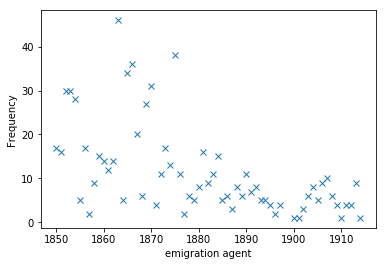

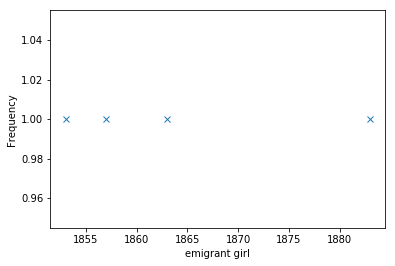

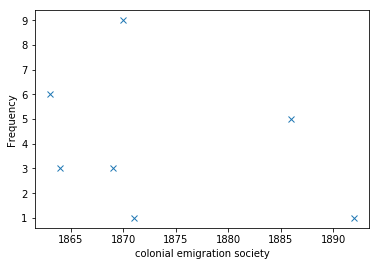

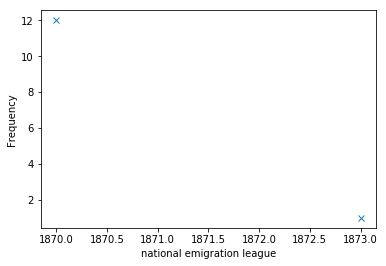

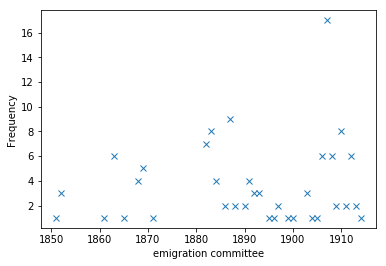

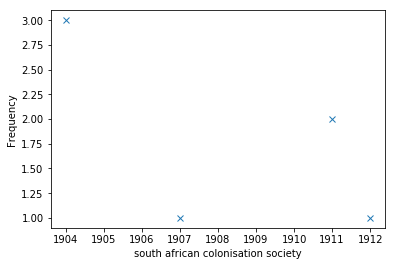

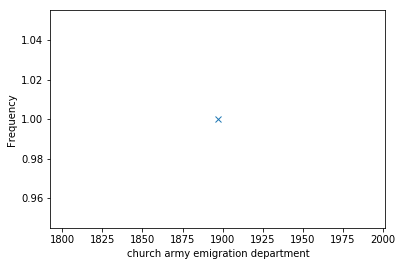

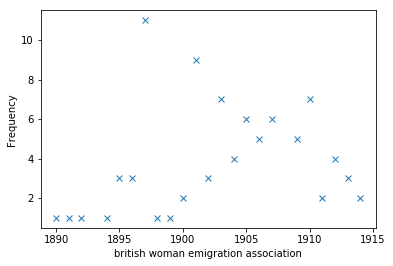

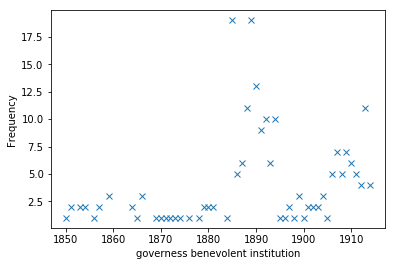

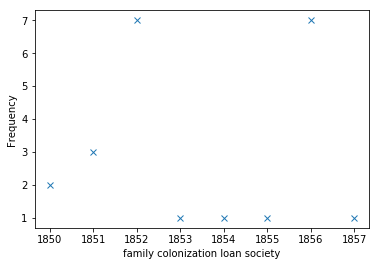

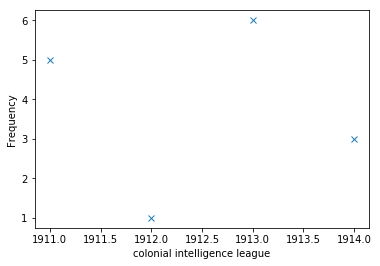

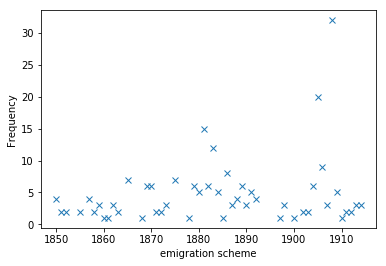

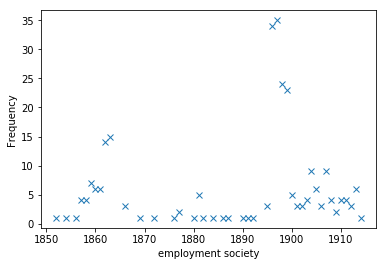

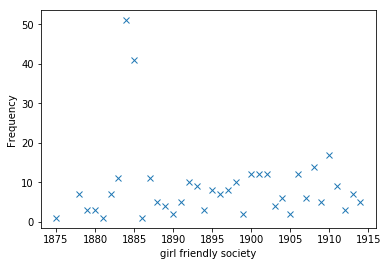

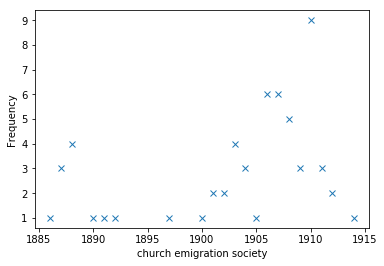

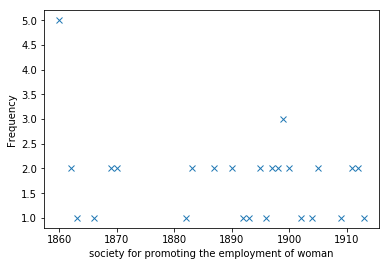

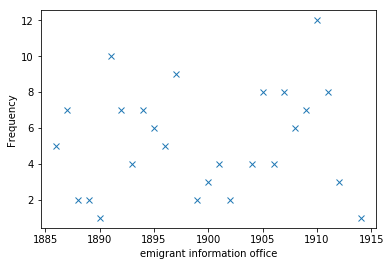

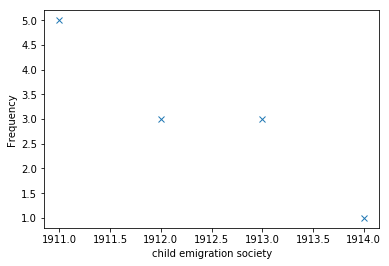

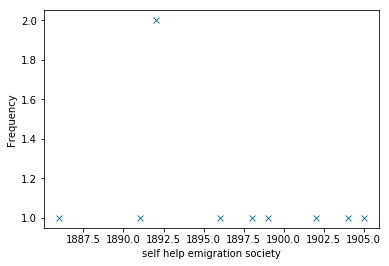

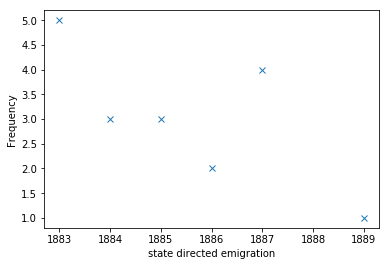

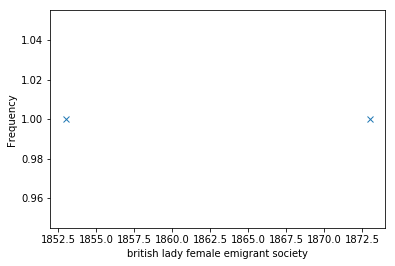

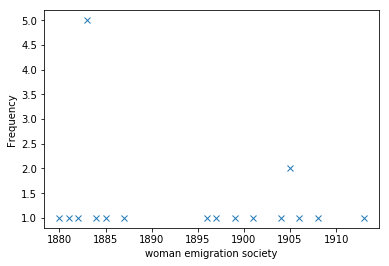

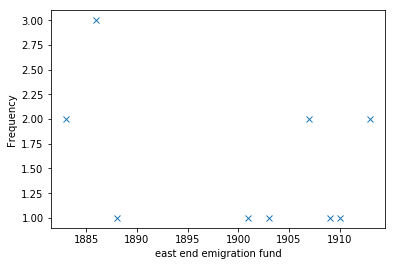

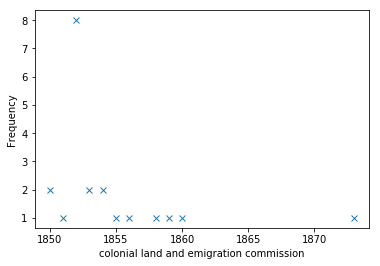

In [12]:
societies_list=freq_results.keys()
for society in societies_list:
    plot_freq_society(freq_results, society)

## 2. Normalised frequencies results

Here, we are examining the total number of isses, articles and words published over the period to see how much our search sentences are affected by the way that the number of issues (and articles, and words!) published increases over the measurement period.

In [13]:
publication=read_query_results('results_tda_normalized_1850_1914')

We count the total articles per year, and then count the number of articles in which each keysentence appear per year, and plot normalised frequency on a graph (x axis is years), to see whether which societies are becoming more or less popular with time.

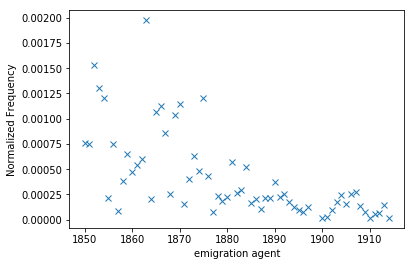

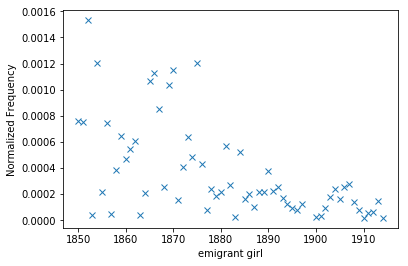

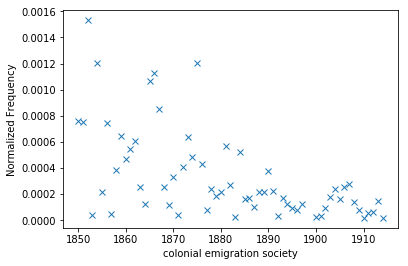

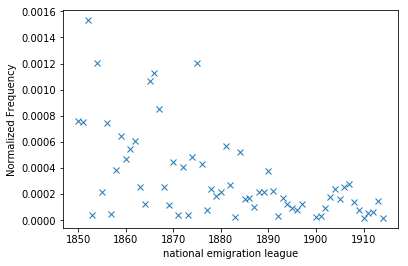

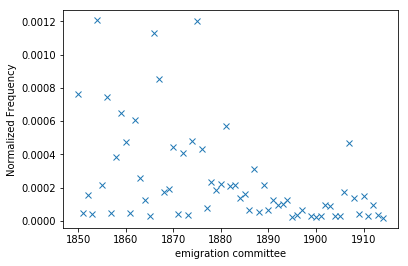

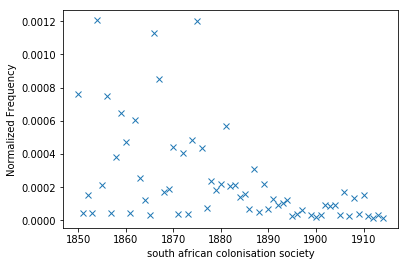

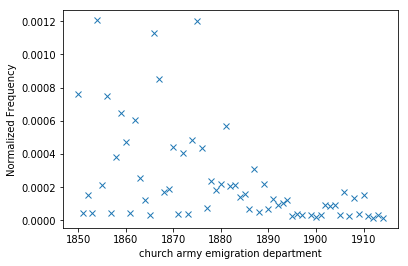

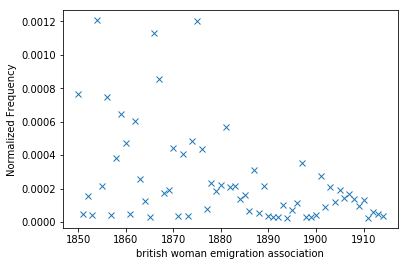

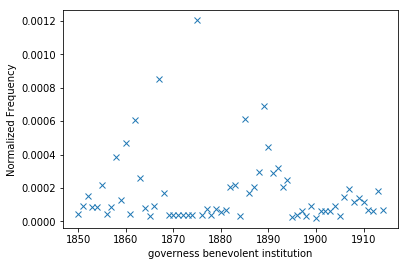

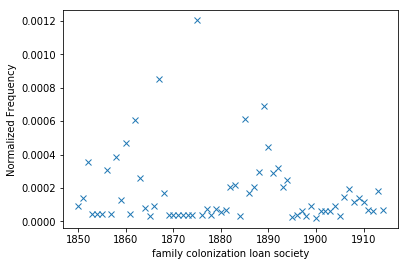

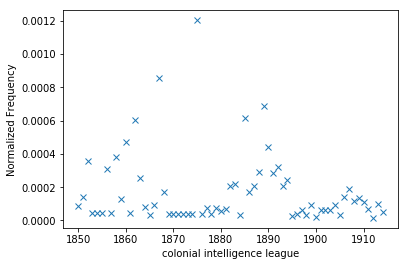

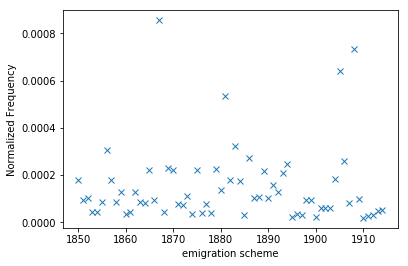

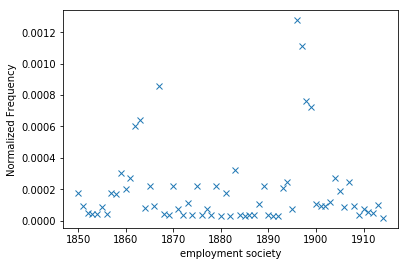

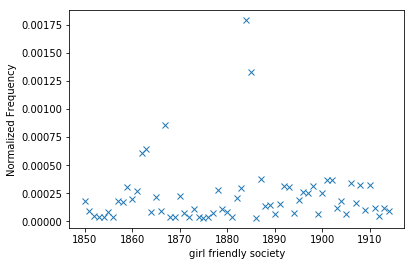

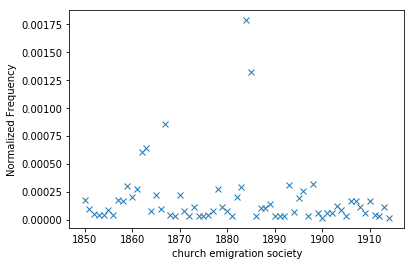

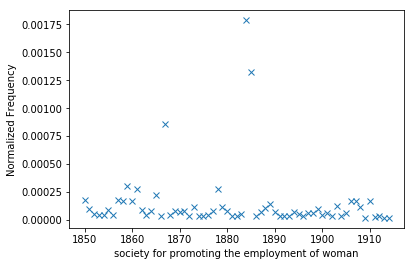

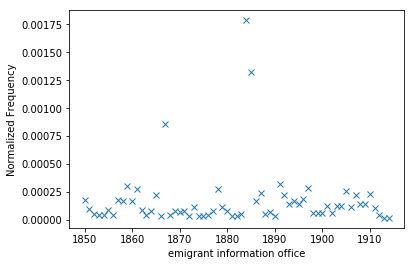

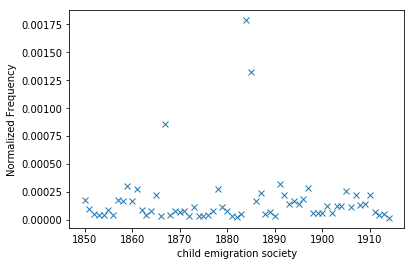

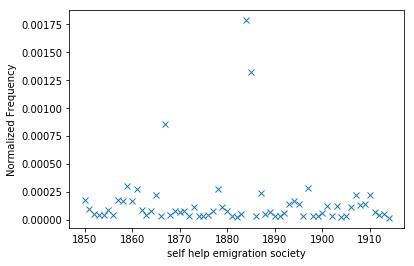

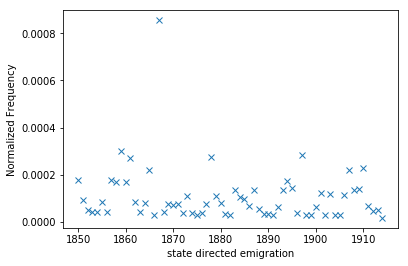

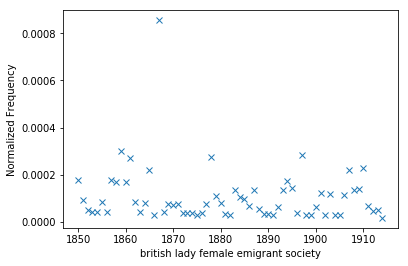

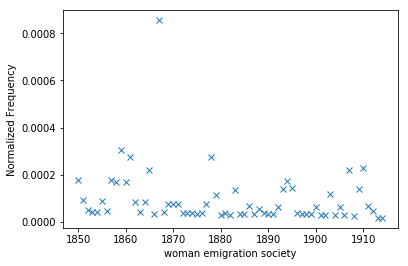

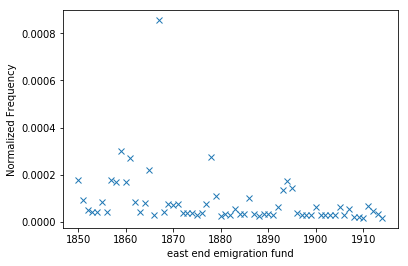

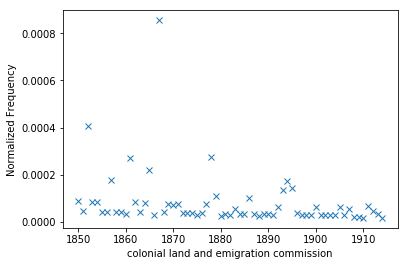

In [14]:
normed_results = {}
for society in societies_list:
    for year in freq_results[society]:
        if year>0:
            normed_results[year] = freq_results[society][year]/float(publication[year][1])
    plt.plot(normed_results.keys(), normed_results.values(), 'x')
    plt.xlabel(society)
    plt.ylabel("Normalized Frequency")
    plt.show()

